In [133]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np

# a)

In [134]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.t(0)
initial_state = [np.cos(np.pi/8),np.exp(1j*np.pi/2)*np.sin(np.pi/8)]
qc.initialize(initial_state,[1])
qc.cx(1,0)
qc.measure(0,0)
qc.s(1).c_if(0,1)
# qc.save_statevector()
qc.draw()


┌───┐              ┌───┐┌───┐┌─┐           
q_0: ─────────────┤ H ├──────────────┤ T ├┤ X ├┤M├───────────
     ┌────────────┴───┴─────────────┐└───┘└─┬─┘└╥┘   ┌───┐   
q_1: ┤ Initialize(0.92388,0.38268j) ├───────■───╫────┤ S ├───
     └──────────────────────────────┘           ║    └─╥─┘   
                                                ║ ┌────╨────┐
c: 2/═══════════════════════════════════════════╩═╡ c_0=0x1 ╞
                                                0 └─────────┘

In [135]:
from qiskit_aer import AerSimulator

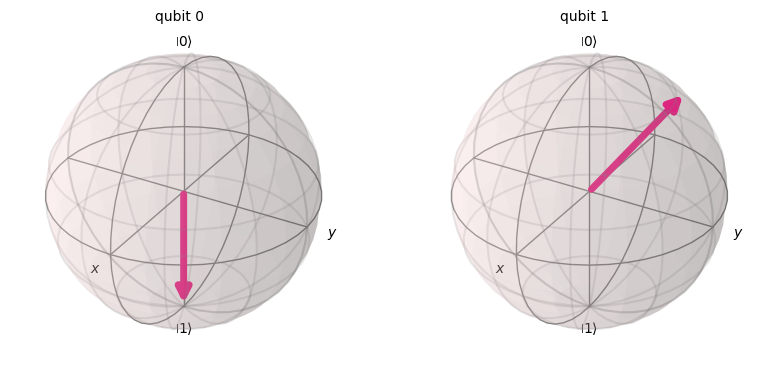

In [136]:
qc1 = qc.copy()
qc1.save_statevector()
statevector = AerSimulator(method="statevector", shots=1000).run(qc1).result().get_statevector()
statevector.draw(output='bloch')

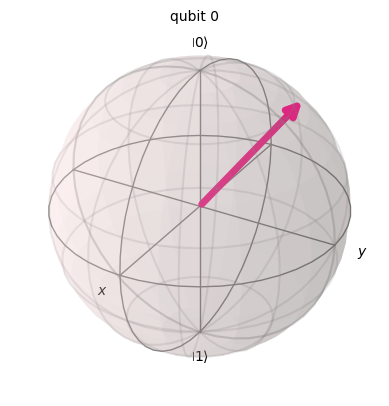

In [137]:
qc2 = QuantumCircuit(1)
initial_state = [np.cos(np.pi/8),np.exp(1j*np.pi/2)*np.sin(np.pi/8)]
qc2.initialize(initial_state,[0])
qc2.t(0)
qc2.save_statevector()
statevector2 = AerSimulator(method="statevector", shots=1000).run(qc2).result().get_statevector()
statevector2.draw(output='bloch') 


# b)

In [140]:
from qiskit.result import marginal_counts
simu = AerSimulator()
def get_ev(dict):
    return (dict['0']*1-dict['1'])/(dict['0']+dict['1'])
def get_second_qubit_resdict(counts):
    resdict_out = {}

    for key, value in counts.items():
        if key[0] in resdict_out:
            resdict_out[key[0]] += value
        else: resdict_out[key[0]] = value
    return resdict_out

qcx = qc.copy()
qcx.h(1)
qcx.measure(1,1)
countsx = simu.run(qcx, shots=10_000).result().get_counts()
qcz = qc.copy()
qcz.measure(1,1)
countsz = simu.run(qcz, shots=10_000).result().get_counts()
qcy = qc.copy()
qcy.sdg(1)
qcy.h(1)
qcy.measure(1,1)
countsy = simu.run(qcy, shots=10_000).result().get_counts()


-0.5052


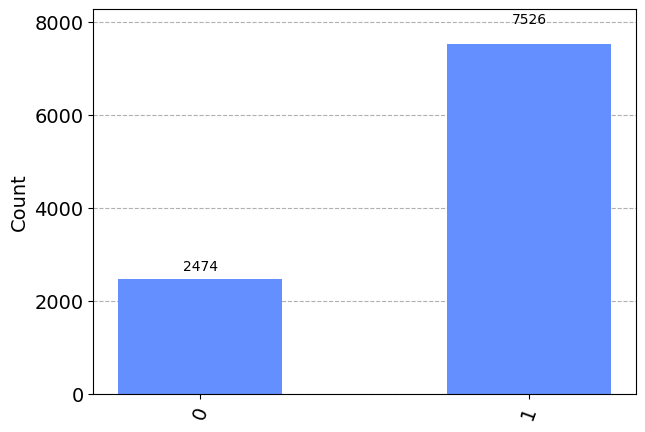

In [141]:
resdictx = get_second_qubit_resdict(countsx)
print(get_ev(resdictx))
plot_histogram(resdictx)

0.5008


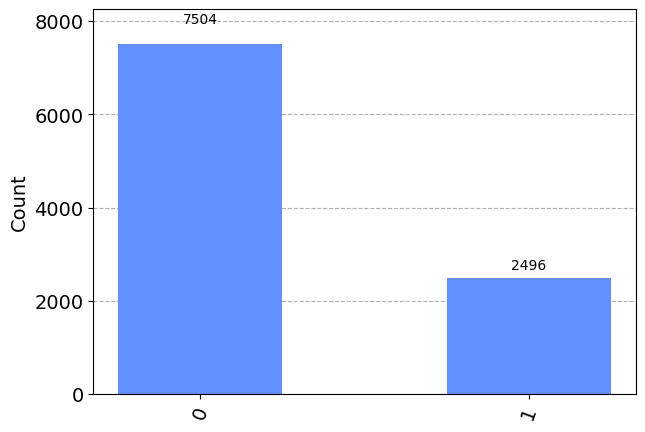

In [142]:
resdicty = get_second_qubit_resdict(countsy)
print(get_ev(resdicty))
plot_histogram(resdicty)

0.708


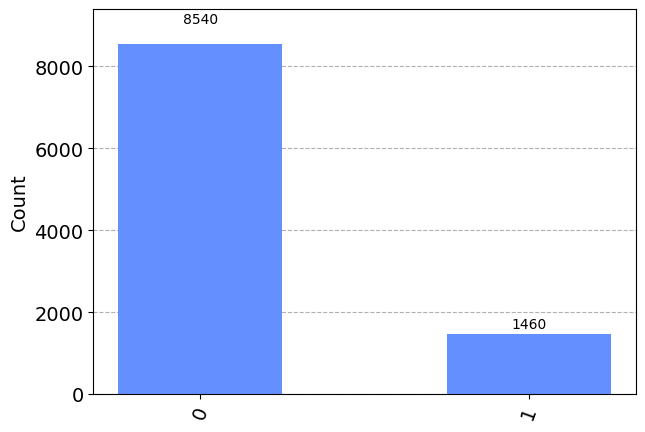

In [143]:
resdictz = get_second_qubit_resdict(countsz)
print(get_ev(resdictz))
plot_histogram(resdictz)

# c)

In [101]:
from qiskit_ibm_provider import IBMProvider

file_token = open("ibm_login_token_clemens.txt")
token = file_token.read()
file_token.close()

IBMProvider.save_account(overwrite=True, token=token)
provider = IBMProvider()


name = 'ibm_osaka'
backend = provider.get_backend(name)

In [113]:
from qiskit import transpile
real_circs = []
for qc in [qcx,qcy,qcz]:
    qc_real = transpile(qc, backend=backend)
    real_circs.append(qc_real)

In [125]:
print(f'Submit all {len(real_circs)} circuits to '+name)
job = backend.run(real_circs, shots = 10_000)
job.job_id()

Submit all 3 circuits to ibm_osaka


'csj5b2cp1vzg0089xj9g'

In [126]:
job_id = 'csj5b2cp1vzg0089xj9g'
results_all = provider.backend.retrieve_job(job_id).result()

In [127]:
resdictx = get_second_qubit_resdict(results_all.get_counts(0))
resdicty = get_second_qubit_resdict(results_all.get_counts(1))
resdictz = get_second_qubit_resdict(results_all.get_counts(2))
print("X expectation value:", get_ev(resdictx))
print("Y expectation value:", get_ev(resdicty))
print("Z expectation value:", get_ev(resdictz))

X expectation value: -0.3354
Y expectation value: 0.355
Z expectation value: 0.478


# d)

In [171]:
qcsteane = QuantumCircuit(7,7)
qcsteane.cx(6,[4,5])
qcsteane.h([0,1,2])
qcsteane.cx(0,[3,5,6])
qcsteane.barrier()
qcsteane.cx(1,[3,4,6])
qcsteane.barrier()
qcsteane.cx(2,[3,4,5])
qcsteane.draw()

┌───┐                     ░                 ░                
q_0: ┤ H ├──■─────────■────■───░─────────────────░────────────────
     ├───┤  │         │    │   ░                 ░                
q_1: ┤ H ├──┼─────────┼────┼───░───■────■────■───░────────────────
     ├───┤  │         │    │   ░   │    │    │   ░                
q_2: ┤ H ├──┼─────────┼────┼───░───┼────┼────┼───░───■────■────■──
     └───┘┌─┴─┐       │    │   ░ ┌─┴─┐  │    │   ░ ┌─┴─┐  │    │  
q_3: ─────┤ X ├───────┼────┼───░─┤ X ├──┼────┼───░─┤ X ├──┼────┼──
          ├───┤       │    │   ░ └───┘┌─┴─┐  │   ░ └───┘┌─┴─┐  │  
q_4: ─────┤ X ├───────┼────┼───░──────┤ X ├──┼───░──────┤ X ├──┼──
          └─┬─┘┌───┐┌─┴─┐  │   ░      └───┘  │   ░      └───┘┌─┴─┐
q_5: ───────┼──┤ X ├┤ X ├──┼───░─────────────┼───░───────────┤ X ├
     ┌───┐  │  └─┬─┘└───┘┌─┴─┐ ░           ┌─┴─┐ ░           └───┘
q_6: ┤ X ├──■────■───────┤ X ├─░───────────┤ X ├─░────────────────
     └───┘               └───┘ ░           └───┘ ░                
c: 7/═════════════════════════════════════════════════════════════

In [170]:
qcsteane.save_statevector()
statevectorsteane = AerSimulator(method="statevector", shots=1000).run(qcsteane).result().get_statevector()
statevectorsteane.draw(output='latex') 

<IPython.core.display.Latex object>

# e)

In [192]:
qcsteane2 = QuantumCircuit(15,1)
# prepare |T>
qcsteane2.h(6)
qcsteane2.t(6)
# encode first qubit
qcsteane2.cx(6,[4,5])
qcsteane2.h([0,1,2])
qcsteane2.cx(0,[3,5,6])
qcsteane2.barrier()
qcsteane2.cx(1,[3,4,6])
qcsteane2.barrier()
qcsteane2.cx(2,[3,4,5])
# prepare |+>
qcsteane2.h(6+7)
# encode second qubit
qcsteane2.cx(6+7,[4+7,5+7])
qcsteane2.h([0+7,1+7,2+7])
qcsteane2.cx(0+7,[3+7,5+7,6+7])
qcsteane2.barrier()
qcsteane2.cx(1+7,[3+7,4+7,6+7])
qcsteane2.barrier()
qcsteane2.cx(2+7,[3+7,4+7,5+7])
qcsteane2.draw()

┌───┐                          ░                 ░                     »
 q_0: ┤ H ├──■──────────────■────■───░─────────────────░─────────────────────»
      ├───┤  │              │    │   ░                 ░                     »
 q_1: ┤ H ├──┼──────────────┼────┼───░───■────■────■───░─────────────────────»
      ├───┤  │              │    │   ░   │    │    │   ░                     »
 q_2: ┤ H ├──┼──────────────┼────┼───░───┼────┼────┼───░───■────■────■───────»
      └───┘┌─┴─┐            │    │   ░ ┌─┴─┐  │    │   ░ ┌─┴─┐  │    │       »
 q_3: ─────┤ X ├────────────┼────┼───░─┤ X ├──┼────┼───░─┤ X ├──┼────┼───────»
           └───┘┌───┐       │    │   ░ └───┘┌─┴─┐  │   ░ └───┘┌─┴─┐  │       »
 q_4: ──────────┤ X ├───────┼────┼───░──────┤ X ├──┼───░──────┤ X ├──┼───────»
                └─┬─┘┌───┐┌─┴─┐  │   ░      └───┘  │   ░      └───┘┌─┴─┐     »
 q_5: ────────────┼──┤ X ├┤ X ├──┼───░─────────────┼───░───────────┤ X ├─────»
      ┌───┐┌───┐  │  └─┬─┘└───┘┌─┴─┐ ░           ┌─┴─┐ ░           └───┘     »
 q_6: ┤ H ├┤ T ├──■────■───────┤ X ├─░───────────┤ X ├─░─────────────────────»
      └───┘└───┘               └───┘ ░           └───┘ ░ ┌───┐               »
 q_7: ───────────────────────────────░─────────────────░─┤ H ├──■─────────■──»
                                     ░                 ░ ├───┤  │         │  »
 q_8: ───────────────────────────────░─────────────────░─┤ H ├──┼─────────┼──»
                                     ░                 ░ ├───┤  │         │  »
 q_9: ───────────────────────────────░─────────────────░─┤ H ├──┼─────────┼──»
                                     ░                 ░ └───┘┌─┴─┐       │  »
q_10: ───────────────────────────────░─────────────────░──────┤ X ├───────┼──»
                                     ░                 ░      ├───┤       │  »
q_11: ───────────────────────────────░─────────────────░──────┤ X ├───────┼──»
                                     ░                 ░      └─┬─┘┌───┐┌─┴─┐»
q_12: ───────────────────────────────░─────────────────░────────┼──┤ X ├┤ X ├»
                                     ░                 ░ ┌───┐  │  └─┬─┘└───┘»
q_13: ───────────────────────────────░─────────────────░─┤ H ├──■────■───────»
                                     ░                 ░ └───┘               »
q_14: ───────────────────────────────░─────────────────░─────────────────────»
                                     ░                 ░                     »
 c: 1/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«            ░                 ░                
« q_0: ──────░─────────────────░────────────────
«            ░                 ░                
« q_1: ──────░─────────────────░────────────────
«            ░                 ░                
« q_2: ──────░─────────────────░────────────────
«            ░                 ░                
« q_3: ──────░─────────────────░────────────────
«            ░                 ░                
« q_4: ──────░─────────────────░────────────────
«            ░                 ░                
« q_5: ──────░─────────────────░────────────────
«            ░                 ░                
« q_6: ──────░─────────────────░────────────────
«            ░                 ░                
« q_7: ──■───░─────────────────░────────────────
«        │   ░                 ░                
« q_8: ──┼───░───■────■────■───░────────────────
«        │   ░   │    │    │   ░                
« q_9: ──┼───░───┼────┼────┼───░───■────■────■──
«        │   ░ ┌─┴─┐  │    │   ░ ┌─┴─┐  │    │  
«q_10: ──┼───░─┤ X ├──┼────┼───░─┤ X ├──┼────┼──
«        │   ░ └───┘┌─┴─┐  │   ░ └───┘┌─┴─┐  │  
«q_11: ──┼───░──────┤ X ├──┼───░──────┤ X ├──┼──
«        │   ░      └───┘  │   ░      └───┘┌─┴─┐
«q_12: ──┼───░─────────────┼───░───────────┤ X ├
«      ┌─┴─┐ ░           ┌─┴─┐ ░           └───┘
«q_13: ┤ X ├─░───────────┤ X ├─░────────────────
«      └───┘ ░           └─

{'1': 1449, '0': 8551}
Expectation value of X measurement: 0.7102


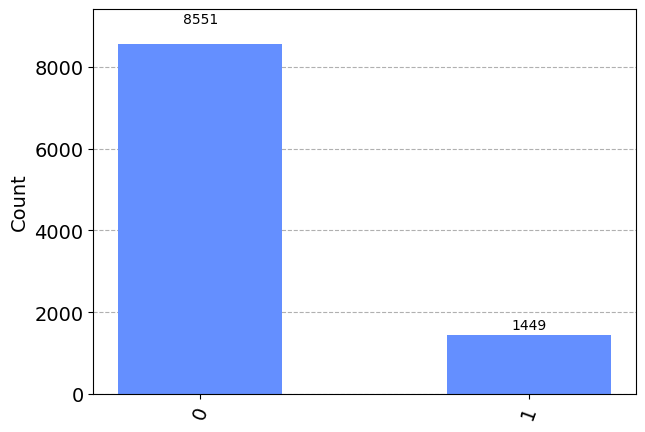

In [196]:
qcsteane2x = qcsteane2.copy()
qcsteane2x.h(range(7))
qcsteane2x.cx(range(7),14)
qcsteane2x.measure(14,0)
countsxsteane = simu.run(qcsteane2x, shots=10_000).result().get_counts()
print(countsxsteane)
print("Expectation value of X measurement:", (countsxsteane['0']-countsxsteane['1'])/10_000)
plot_histogram(countsxsteane)


{'1': 1448, '0': 8552}
Expectation value of Y measurement: 0.7104


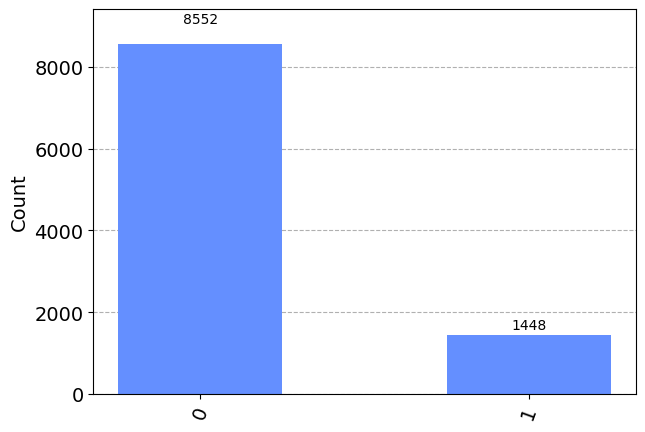

In [197]:
qcsteane2y = qcsteane2.copy()
qcsteane2y.s(range(7))
qcsteane2y.h(range(7))
qcsteane2y.cx(range(7),14)
qcsteane2y.measure(14,0)
countsysteane = simu.run(qcsteane2y, shots=10_000).result().get_counts()
print(countsysteane)
print("Expectation value of Y measurement:", (countsysteane['0']-countsysteane['1'])/10_000)
plot_histogram(countsysteane)

{'0': 4938, '1': 5062}
Expectation value of Z measurement: -0.0124


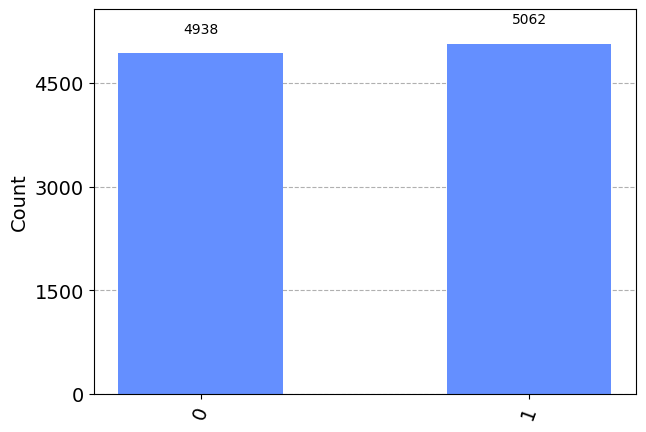

In [198]:
qcsteane2z = qcsteane2.copy()
qcsteane2z.cx(range(7),14)
qcsteane2z.measure(14,0)
countszsteane = simu.run(qcsteane2z, shots=10_000).result().get_counts()
print(countszsteane)
print("Expectation value of Z measurement:", (countszsteane['0']-countszsteane['1'])/10_000)

plot_histogram(countszsteane)